# Single neuron simulation in BRIAN

Our goal is to understand some of how a simple neuron equation works.

We'll use a very powerful package called `brian`, designed to flexibly simulate **integrate-and-fire** models.
It's also very complicated.

*I barely understand `brian` syntax, our goal here is just to use it to easily simulate some simple neurons.*
If you run into the situation where a bunch of errors start popping up, try restarting the kernel.

There are lots of cool examples here: https://brian2.readthedocs.io/en/stable/examples/

In [1]:
from brian2 import *
%matplotlib inline

Text(0, 0.5, 'Membrane potential (V)')

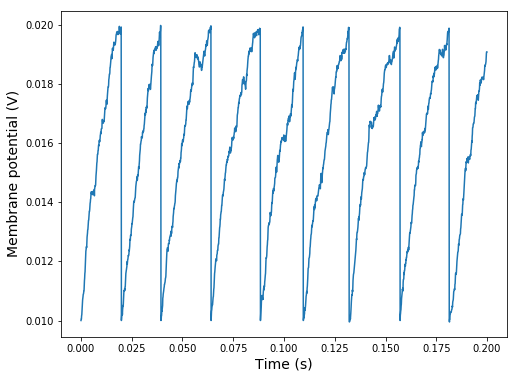

In [12]:
Vr = 10*mV
theta = 20*mV
tau = 20*ms
delta = 2*ms
taurefr = 2*ms
duration = .2*second

# Parameters we will play with
muext = 25*mV     # strength of tonic (constant) input to the neuron
sigmaext = 1*mV   # strength of noise input to the neuron

# Equations of motion
# note: xi is shorthand white noise
eq = """
dV/dt = (-V + muext + sigmaext * sqrt(tau) * xi)/tau : volt
"""

neuron = NeuronGroup(1, eq, threshold='V>theta',
                     reset='V=Vr', refractory=taurefr, method='euler')
neuron.V = Vr

M = StateMonitor(neuron, ['V'], record = True)

run(duration)

figure(figsize=(8,6))
plot(M.t, M.V.flatten())
xlabel('Time (s)', fontsize=14)
ylabel('Membrane potential (V)', fontsize=14)

## Exercise 1
Before you change the parameters, what do you notice about the above trajectory? Where does it jump, and when it does, from and to which values does it jump? Try and identify the parameters that govern this behavior.

(Hint: the jumps correspond to where the neuron spikes.)

## Exercise 2
Now, let's change some parameters. See what you observe. Try:
* Increase / decrease the input noise strength
* Increase / decrease the tonic drive current

Do you ever get *qualitatively* different behavior?

## Exercise 3 (optional, or go on to the Synchronization notebook)
Consider the equation defined in
```
eq = """
dV/dt = (-V + muext + sigmaext * sqrt(tau) * xi)/tau : volt
"""
```
An equivalent, simpler version of the same equation is the stochastic differential equation

$$
\frac{dV}{dt} = -V + I + \sigma \frac{dW}{dt} ,
$$
where $\frac{dW}{dt}$ is the derivative of a white noise process 
(don't worry about this if you don't know what it is... think Gaussian random variables).

For this exercise:
* Consider the case where $\sigma = 0$, and solve the above ODE.
* Where is the fixed point, and is it stable? For the parameters that we actually simulated, do the dynamics ever get to the fixed point?